# 神经网络

## 感知机


感知机模型的结构如图所示，它接受长度为𝑛的一维向量$X = [x_1, x_2, … , x_n]$，每个输入节点通过权值为$w_i, i\in[1, n]$的连接汇集为变量$z$，即：
$$z = w_1x_1 + w_2x_2 + ⋯ + 𝑤_nx_n + b$$
其中𝑏称为感知机的偏置(Bias)，一维向量$w = [w_1, w_2, … , w_n]$称为感知机的权值(Weight)，$𝑧$称为感知机的净活性值(Net Activation)。

![](./感知机.png)

向量形式:
$$z = w^Tx + b$$
感知机是线性模型，并不能处理线性不可分问题。通过在线性模型后添加激活函数后得到活性值(Activation)$\alpha$:
$$\alpha = \sigma(z) = \sigma(w^T + b)$$

$\sigma$激活函数可以是阶跃函数(Step function)或符号函数(Sign function)

添加激活函数后，感知机可以用来完成二分类任务。阶跃函数和符号函数在𝑧 = 0处是不连续的，其他位置导数为 0，无法利用梯度下降算法进行参数优化。

## 全连接层

![](./全连接层.png)

整个网络层关系:
$$
\begin{bmatrix} o_1 & o_2\end{bmatrix} = 
\begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix} @
\begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32}\end{bmatrix} +
\begin{bmatrix} b_1 & b_2\end{bmatrix}
$$
即 $$O = X @ W + b$$
输入矩阵X的shape定义为$[b, d_{in}]$，𝑏为样本数量，此处只有1个样本参与前向运算，$d_{in}$为输入节点数；权值矩阵 W 的 shape 定义为$[d_{in}, d_{out}]$，$𝑑_{out}$为输出节点数，偏置向量 b的 shape 定义为$[𝑑_{out}]$。

由于每个输出节点与全部的输入节点相连接，这种网络层称为`全连接层(Fully-connected Layer)`，或者`稠密连接层(Dense Layer)`，𝑾矩阵叫做全连接层的权值矩阵，𝒃向量叫做全连接层的偏置向量。

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['Noto Sans CJK JP']
matplotlib.rcParams['axes.unicode_minus']=False 

gpus = tf.config.experimental.list_physical_devices("GPU")
try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except RuntimeError as e:
    print(e)

In [4]:
# 使用张量方式实现全层连接

x = tf.random.normal([2, 784])
w1 = tf.Variable(tf.random.truncated_normal([784, 256]))
b1 = tf.Variable(tf.zeros([256]))
o1 = x @ w1 + b1
o1 = tf.nn.relu(o1)

In [2]:
# tensorflow layers层方式实现
from tensorflow.keras import layers

x = tf.random.normal([4, 28 * 28])
# 创建全连接层，指定输出节点数和激活函数
fc = layers.Dense(256, activation=tf.nn.relu)
h1 = fc(x)  # 输入的节点数在fc(x)计算时自动获取
h1

<tf.Tensor: shape=(4, 256), dtype=float32, numpy=
array([[1.1241688 , 0.        , 0.60394585, ..., 1.4449539 , 0.75517726,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98013437, 2.148665  , 0.        , ..., 1.6181704 , 1.9951206 ,
        0.5312636 ],
       [0.07182252, 0.29390582, 2.1300454 , ..., 0.38233137, 1.8297863 ,
        0.        ]], dtype=float32)>

In [3]:
fc.kernel  # 获取 Dense 类的权值矩阵 w

<tf.Variable 'dense/kernel:0' shape=(784, 256) dtype=float32, numpy=
array([[-0.00196888, -0.03643783, -0.02934927, ..., -0.04398411,
         0.02617917,  0.02585495],
       [ 0.00146847, -0.05579101, -0.02454717, ..., -0.02718972,
         0.00927743, -0.03098236],
       [-0.00114627, -0.00938635,  0.0010112 , ..., -0.06013872,
         0.07190046,  0.02896936],
       ...,
       [-0.04982423,  0.00492059,  0.02656615, ...,  0.01606629,
         0.0517101 , -0.01304851],
       [-0.0413155 , -0.03269337, -0.05778476, ...,  0.0693967 ,
        -0.0289179 ,  0.01546513],
       [-0.05905869,  0.0526505 ,  0.03307108, ..., -0.02206163,
         0.03093424,  0.05352642]], dtype=float32)>

In [4]:
fc.bias  # 获取 Dense 类的偏置向量

<tf.Variable 'dense/bias:0' shape=(256,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.

In [6]:
fc.trainable_variables  # 返回待优化参数列表
# fc.non_trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(784, 256) dtype=float32, numpy=
 array([[-0.00196888, -0.03643783, -0.02934927, ..., -0.04398411,
          0.02617917,  0.02585495],
        [ 0.00146847, -0.05579101, -0.02454717, ..., -0.02718972,
          0.00927743, -0.03098236],
        [-0.00114627, -0.00938635,  0.0010112 , ..., -0.06013872,
          0.07190046,  0.02896936],
        ...,
        [-0.04982423,  0.00492059,  0.02656615, ...,  0.01606629,
          0.0517101 , -0.01304851],
        [-0.0413155 , -0.03269337, -0.05778476, ...,  0.0693967 ,
         -0.0289179 ,  0.01546513],
        [-0.05905869,  0.0526505 ,  0.03307108, ..., -0.02206163,
          0.03093424,  0.05352642]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(256,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

## 神经网络
通过层层堆叠全连接层，保证前一层的输出节点数与当前层的输入节点数匹配,即可堆叠出任意层数的网络-神经网络

![](./神经网络.png)

In [17]:
x = tf.random.normal([2, 784])

### 使用张量实现

In [2]:
w1 = tf.Variable(tf.random.truncated_normal([784, 256]))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128]))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 64]))
b3 = tf.Variable(tf.zeros([64]))
w4 = tf.Variable(tf.random.truncated_normal([64, 10]))
b4 = tf.Variable(tf.zeros([10]))

In [4]:
with tf.GradientTape() as tape:
    h1 = x @ w1 + b1
    h1 = tf.nn.relu(h1)
    h2 = h1 @ w2 + b2
    h2 = tf.nn.relu(h2)
    h3 = h2 @ w3 + b3g
    h3 = tf.nn.relu(h3)
    out = h3 @ w4 + b4
    # loss = ...
    # 最后一层是否需要添加激活函数通常视具体的任务而定，这里加不加都可以
# grads = tape.gradient(loss, [])

### 使用层方式实现

In [18]:
from tensorflow.keras import layers, Sequential
# 隐藏层
fc1 = layers.Dense(256, activation=tf.nn.relu)
fc2 = layers.Dense(128, activation=tf.nn.relu)
fc3 = layers.Dense(64, activation=tf.nn.relu)
# 输入层
fc4 = layers.Dense(10, activation=None)

h1 = fc1(x)
h2 = fc2(h1)
h3 = fc3(h2)
out = fc4(h3)
out

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[ 0.54427606,  0.47934318,  0.7470396 , -1.9248563 ,  0.20564038,
        -1.4412487 , -0.7584313 ,  0.28273773,  1.0097896 ,  0.9988563 ],
       [ 0.25447166, -0.04221916,  0.46476752, -0.3626588 , -0.28187388,
        -0.76575005, -0.14894792, -0.29455334,  1.1615628 ,  0.580118  ]],
      dtype=float32)>

In [8]:
# 使用Sequential封装
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu), 
    layers.Dense(128, activation=tf.nn.relu), 
    layers.Dense(64, activation=tf.nn.relu), 
    layers.Dense(10, activation=tf.nn.relu), 
])
out = model(x)
out

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.        , 0.        , 0.3704154 , 1.0659297 , 0.        ,
        1.2935647 , 0.        , 0.08432132, 0.        , 0.        ],
       [0.5579782 , 0.        , 0.        , 1.3533514 , 1.026191  ,
        0.1332192 , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)>

### 优化目标
我们把神经网络从输入到输出的计算过程叫做`前向传播(Forward Propagation)`或前向计算。神经网络的前向传播过程，也是数据张量(Tensor)从第一层流动(Flow)至输出层的过程，即从输入数据开始，途径每个隐藏层，直至得到输出并计算误差，这也是 TensorFlow框架名字由来。

前向传播最后一步, 误差计算:

$$ L = g(f_{\theta}(x), y)$$

优化目标:
$$\theta^*= \mathop{argmin}_{\theta} g(f_{\theta}(x), y), x\in D^{train}$$
一般采用误差反向传播(Backward Propagation，简称 BP)算法来求解网络参数𝜃的梯度信息，并利用梯度下降(Gradient Descent，简称 GD)算法迭代更新参数:
$$\theta'= \theta - \eta \cdot \nabla_{\theta}L$$

### 各种激活函数


Sigmoid函数

也叫logistic函数:
$$ Sigmoid(x) = \frac {1} {1+e^{-x}}$$

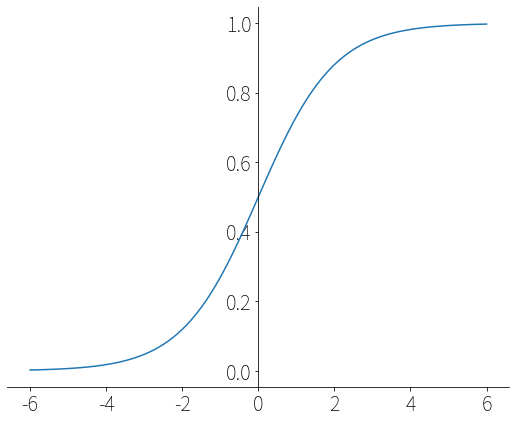

In [9]:
x = tf.linspace(-6., 6, 100)
plt.plot(x, tf.nn.sigmoid(x))
ax = plt.gca()

ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

In [ ]:
# 像 Dense 层一样将ReLU 函数作为一个网络层添加到网络中
# layers.ReLU() 

ReLU函数(REctified Linear Unit，修正线性单元)

Sigmoid 函数在输入值较大或较小时容易出现梯度值接近于 0 的现象，称为梯度弥散现象。出现`梯度弥散`(梯度消失)现象时，网络参数长时间得不到更新，导致训练不收敛或停滞不动的现象发生，较深层次的网络模型中更容易出现梯度弥散现象.ReLU 对小于 0 的值全部抑制为 0；对于正数则直接输出，这种单边抑制特性来源于生物学.
$$Relu(x) = max(0, x)$$

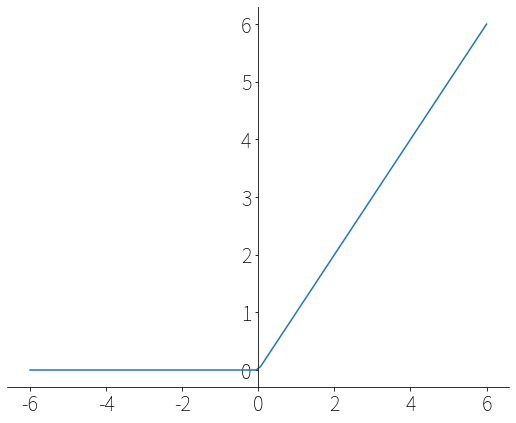

In [11]:
x = tf.linspace(-6., 6, 100)
plt.plot(x, tf.nn.relu(x))
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

LeakyReLU
ReLU 函数在𝑥 < 0时导数值恒为 0，也可能会造成梯度弥散现象，为了克服这个问题，LeakyReLU 函数被提出:
$$LeakyReLU = \begin{cases} x \quad x \geq 0  \\ px \quad x < 0\end{cases}$$

其中𝑝为用户自行设置的某较小数值的超参数，如 0.02 等。当𝑝 = 0时，LeayReLU 函数退化为 ReLU 函数；当𝑝 ≠ 0时，𝑥< 0处能够获得较小的导数值𝑝，从而避免出现梯度弥散现象

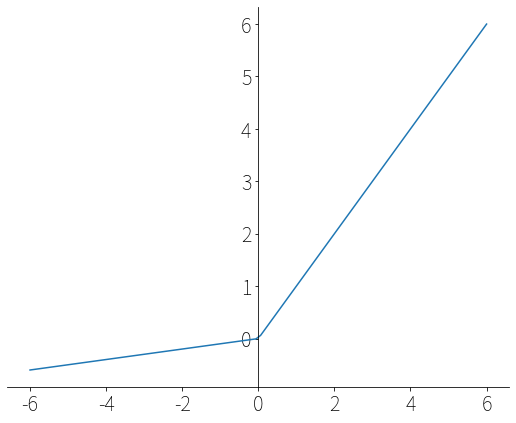

In [15]:
x = tf.linspace(-6., 6, 100)
plt.plot(x, tf.nn.leaky_relu(x, alpha=0.1))
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

Tanh函数能将数据压缩到(-1, 1)区间
$$tanh(x) = \frac {e^x - e^{-x}} {e^x + e^{-x}} = 2 \cdot sigmoid(2x) - 1$$

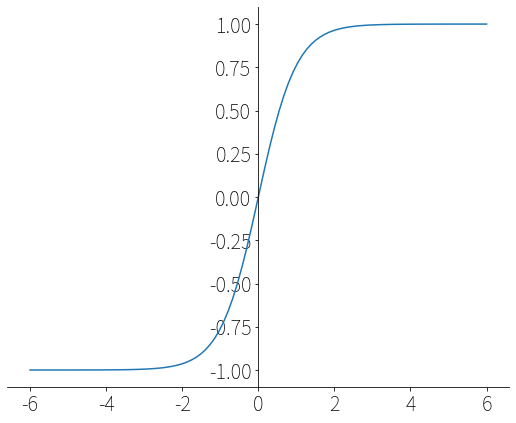

In [23]:
x = tf.linspace(-6., 6, 100)
# tf.nn.tanh
plt.plot(x, tf.tanh(x))
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

## 输出层的设计
最后一层需要根据具体的任务场景来决定是否使用激活函数, 以及使用什么类型的激活函数等:

1. 普通实数空间$o_i \in R^d$, 这一类问题比较普遍，像正弦函数曲线预测、年龄的预测、股票走势的预测等都属于整个或者部分连续的实数空间，输出层可以不加激活函数
1. $o_i \in [0, 1]$, 输出值特别地落在\[0, 1\]的区间，如图片生成，图片像素值一般用\[0, 1\]区间的值表示；或者二分类问题的概率，如硬币正反面的概率预测问题, 输出层可以只设一个节点, 表示事件发生的概率.可以使用Sigmoid函数
1. $o_i \in [0, 1]$, 且$\sum_i o_i = 1$, 常见的如多分类问题，如 MNIST 手写数字图片识别，图片属于 10 个类别的概率之和应为 1。在输出层添加Sogtmax函数实现
1. $o_i \in [-1, 1]$, 可以简单的使用tf.tanh函数

In [22]:
# softmax 函数
z = tf.constant([2, 1, 0.1])
tf.nn.softmax(z)
# 添加 Softmax 层
# layers.Softmax(axis=-1)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6590012, 0.242433 , 0.0985659], dtype=float32)>

在 Softmax 函数的数值计算过程中，容易因输入值偏大发生数值溢出现象；在计算交
叉熵时，也会出现数值溢出的问题。为了数值计算的稳定性，TensorFlow 中提供了一个统
一的接口，将 Softmax 与交叉熵损失函数同时实现，同时也处理了数值不稳定的异常，一
般推荐使用这些接口函数，避免分开使用 Softmax 函数与交叉熵损失函数。函数式接口为
`tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False)`，其中 y_true 代表了
One-hot 编码后的真实标签，y_pred 表示网络的预测值，当 from_logits 设置为 True 时，
y_pred 表示须为未经过 Softmax 函数的变量 z；当 from_logits 设置为 False 时，y_pred 表示
为经过 Softmax 函数的输出。为了数值计算稳定性，一般设置 from_logits 为 True，此时
tf.keras.losses.categorical_crossentropy 将在内部进行 Softmax 函数计算，所以不需要在模型
中显式调用 Softmax 函数

In [25]:
z = tf.random.normal([2, 10])  # 模拟输出层
y_onehot = tf.one_hot(tf.constant([1, 3]), depth=10)
# 未调用softmax函数时, 设置from_logists=True
loss = tf.keras.losses.categorical_crossentropy(y_onehot, z, from_logits=True)
loss = tf.reduce_mean(loss)  # 计算平均交叉熵损失
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.3694634>

In [26]:
criteon = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
loss = criteon(y_onehot, z)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.3694634>

## 误差计算

常见的误差函数有均方差、交叉熵、KL 散度、Hinge Loss 函数等，其中均方差函数和交叉熵函数在深度学习中比较常见，均方差函数主要用于回归问题，交叉熵函数主要用于分类问题。

### 均方差(Mean Squared Error, MSE)
$$MSE(y, o) = \frac 1 {d_{out}} \sum^{d_{out}}_{i=1}(y_i - o_i)^2$$

均方差误差函数广泛应用在回归问题中，实际上，分类问题中也可以应用均方差误差函数。在 TensorFlow 中，可以通过函数方式或层方式实现 MSE 误差计算

In [2]:
from tensorflow import keras

out = tf.random.normal([2, 10])
y_onehot = tf.one_hot(tf.constant([1, 3]), depth=10)
loss = keras.losses.mse(y_onehot, out)  # 每个样本的MSE
loss

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.611568 , 1.1019673], dtype=float32)>

In [3]:
tf.reduce_mean(loss)  # 计算 batch 均方差

<tf.Tensor: shape=(), dtype=float32, numpy=0.85676765>

In [4]:
# 以layer的方式实现
criterion = keras.losses.MeanSquaredError()
loss = criterion(y_onehot, out)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.85676765>

### 交叉熵误差

某个分布P(i)的熵(Entropy)定义为:
$$H(P) = -\sum_iP(i)log_2P(i)$$

In [40]:
# 4类分类问题, 四种等可能情况时 熵
p = tf.constant([0.25, 0.25, 0.25, 0.25])
entropy = tf.reduce_sum(-tf.math.log(p) / tf.math.log([2., 2, 2, 2]) * p )
entropy

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

交叉熵(Cross Entropy):
$$H(p||q) = -\sum_i p(i)log_2q(i)$$
通过变换，交叉熵可以分解为𝑝的熵𝐻(𝑝)和𝑝与𝑞的 KL 散度(Kullback-Leibler Divergence)的和
$$H(p||q) = H(p) + D_{KL}(p||q)$$
KL散度:
$$D_{KL}(p||q) = \sum_i p(i)log(\frac {p(i)}{q(i)})$$
是用于衡量 2 个分布之间距离的指标.当p=q时,$D_{KL}(p||q)$取得最小值, p和q之间的差距越大, $D_{KLD}(p||q)$也就越大.

需要注意的是，交叉熵和 KL 散度都不是对称的.  
交叉熵可以很好地衡量 2 个分布之间的“距离”。特别地，当分类问题中y的编码分布𝑝采用One-hot编码𝒚时：𝐻(𝑝) = 0, 此时
$$H(p||q) = H(p) + D_{KL}(p||q)= D_{KL}(p||q)$$
推导分类问题中的交叉熵的计算表达式:
$$ H(p||q) = D_{KL}(p||q) = \sum_j y_j log(\frac {y_j} {o_j}) \\
= 1 \cdot log\frac {1}{o_i} + \sum_{i \neq j} 0 \cdot log\frac {0}{o_j} \\
= -logo_i
$$
其中𝑖为 One-hot 编码中为 1 的索引号，也是当前输入的真实类别。可以看到，ℒ只与真实类别𝑖上的概率𝑜𝑖有关，对应概率𝑜𝑖越大，𝐻(𝑝||𝑞)越小。当对应类别上的概率为 1 时，交叉熵𝐻(𝑝||𝑞)取得最小值 0，此时网络输出𝒐与真实标签𝒚完全一致，神经网络取得最优状态.
最小化交叉熵损失函数的过程也是最大化正确类别的预测概率的过程.

## 神经网络类型

- 卷积神经网络(Convolutional Neural Network, CNN): 应用于计算机视觉, 如图片分类;
- 循环神经网络(Recurrent Neural Network, RNN): 序列信号处理, 如理解文本数据, NLP;
- 注意力(机制)网络(Attention Mechanism): 自然语言处理;
- 图卷积神经网络(Graph Convolution Network, GCN): 处理社交网络、通信网络、蛋白质分子结构等一系列的不规则空间拓扑结构的数据